# Résumé des Étapes du Projet

1. **Introduction** :  

   Le désabonnement d'un client se produit lorsque ce dernier décide de cesser d'utiliser les services, le contenu ou les produits d'une entreprise. Il existe de nombreux exemples et cas de désabonnement :
- Annulation d'un service sous contrat ou non ;
- Achat dans un autre magasin concurrent ;
- Désabonnement d'une newsletter ;
- Clôture de compte bancaire ;
- Etc.

Dans ce monde des affaires où une entreprise fait face à de nombreux concurrents, le coût d'acquisition de nouveaux clients est très élevé. Dès lors, la fidélisation des clients existants est plus importante pour les entreprises. Ainsi, l'entreprise doit mieux comprendre le comportement de ses clients afin de les fidéliser. Une façon de le faire consiste à créer un modèle de Machine Learning ou de réseau de neuronnes artificielles qui peut prédire quels clients sont susceptibles de se désabonner. L'entreprise peut ainsi mieux cibler et fidéliser ces clients spécifiques qui présentent un risque plus élevé de désabonnement.

Dans ce projet, nous explorerons un ensemble de données d'une entreprise de télécommunications et créerons un modèle dans le but de prédire les clients présentant un risque de désabonnement plus élevé. Nous utiliserons différents algorithmes de machine learning afin de comparer leurs performances puis nous choisisserons le meilleur modèle.  

2. **Importation des outils nécessaires** :
    

3. **Importation des données** :
   
4. **Analyse exploratoire des données** :
    - Réalisation d'une analyse exploratoire des données pour comprendre leur structure, vérifier les valeurs manquantes, et visualiser les distributions des variables.

5. **Prétraitement des données** :
    - Prétraitement des données pour les rendre appropriées à l'entraînement des modèles. Cela inclut la normalisation des valeurs, le traitement des valeurs manquantes, et la conversion des variables catégorielles en variables numériques.

6. **Modélisation** :
    - Construction et entraînement de plusieurs modèles de classification :
        - **Modèle de Régression logistique** :
            - Entraînement d'un modèle de régression logistique sur l'ensemble d'entraînement.
        - **Modèle de Forêt aléatoire** :
            - Entraînement d'un modèle de forêt aléatoire pour capturer les relations complexes dans les données.
        - **Classificateur Perceptron multicouche** :
            - Entraînement d'un perceptron multicouche pour la classification non linéaire.
        - **Support Vector Machine** :
            - Utilisation d'un SVM pour la classification avec des marges maximales.

7. **Évaluation des modèles** :
    - Évaluation de la performance des modèles sur l'ensemble de test à l'aide de métriques telles que l'exactitude, la précision, le rappel et la F1-score.

8. **Conclusion** :
    - Résumé des résultats obtenus avec chaque modèle et discussion sur les performances respectives.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets #interactive 
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import pickle


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/TUTORIALS/main/Telco-Customer-Churn.csv')
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### la variable cible est la variable CHURN qui prend 2 valeurs yes(le client s'est désabonné) et no(le client ne s'est pas désabonné)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Analyse exploratoire des données 

### Analyse univariée

In [5]:
# variables catégorielles 
categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [6]:
# creation de fct de construction de graphiques à barres  de maniere interactive 
def bar_plot(a):
    df[a].value_counts(normalize=True).plot(kind='bar')
    plt.ylabel('proportion')
    plt.title('Distribution of ' + str(a))
    return plt.show()


In [7]:
#interact 
interact (bar_plot ,a=categorical_columns)

interactive(children=(Dropdown(description='a', options=('gender', 'SeniorCitizen', 'Partner', 'Dependents', '…

<function __main__.bar_plot(a)>

Vous pouvez interagir avec le notebook en sélectionnant la variable catégorielle qui vous intéresse afin de visualiser sa distribution à travers le graphique à barre. Voici quelques informations importantes qu'on peut tirer des graphiques ci-dessus :  

• Il y a plus de clients qui ne se sont pas désabonnés (plus de 70%) que de clients qui se sont désabonné (moins de 30%). Donc nous avons un problème de déséquilibre qu'il faudra absolument résoudre car cela peut impacter négativement la performance des modèles de classification que nous allons construire.   


In [8]:
# echantillonement aléatoire de la variable 'totalcharges'
df['TotalCharges'].sample(10)

3229     1046.1
6230      20.05
1361     330.05
6073     1595.5
5378    4415.75
7008     256.25
1348      857.2
4054    1765.95
5609    2265.25
2875     1873.7
Name: TotalCharges, dtype: object

Apparement c'est à cause de la présence d'espace au niveau de la variable TotalCharges que Pandas la considère comme une variable avec des valeurs de type object (chaîne de caractère).
Donc nous allons remplacer ces espaces par des NaN (Not a Number) et transformer le type de ses valeurs en float (décimal).

In [9]:
# variables quantitatives
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# creation d'une fct de construction d'histogrammes de manière interactive 
def hist_plot(b):
    sns.distplot(df[b], kde=False)
    plt.title('Histogram of ' + str(b))
    return plt.show()

# conversion du type des valeurs de la variable "totalcharges" en float 

df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)


In [10]:
interact(hist_plot,b =numerical_columns )

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

<function __main__.hist_plot(b)>

In [11]:
# coefficient d'asymétrie de la variable 'TotalChaerges'
df['TotalCharges'].skew()
# asymétrique

0.961642499724251

In [12]:
df['tenure'].skew()

0.2395397495619829

In [13]:
df['MonthlyCharges'].skew()

-0.22052443394398033

In [14]:
#creation d une fct de construction de boites a moustaches de maniere interactive  
def box_plot(b):
    sns.boxplot(y = df[b])
    plt. title( 'Boxplot of ' + str(b))
    return plt. show()


#Interact
interact(box_plot, b = numerical_columns);

interactive(children=(Dropdown(description='b', options=('tenure', 'MonthlyCharges', 'TotalCharges'), value='t…

Nous remarquons que ces variables contines bien que ne présentant pas de valeurs aberrantes (outliers) sont très asymétriques ce qui peut causer des erreurs au niveau des modèles que nous allons construire.
Nous pouvons appliquer des fonctions de transformation à ces variables afin de les rendre moins asymétrique.
Nous avons une compréhension de la distribution de chaque variable dans notre jeu de données.
Maintenant, faisons des analyse bivariées.

### Analyse bivariées

Text(0.5, 1.0, 'montant totale facture au client ')

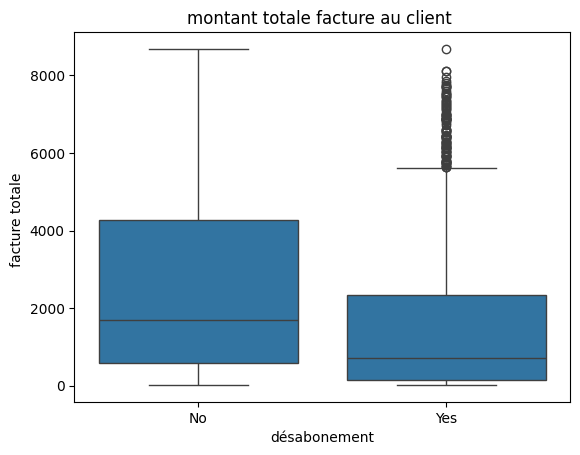

In [15]:
# total charge  VS churn 
sns.boxplot(x='Churn' , y='TotalCharges',data = df)
plt.xlabel('désabonement')
plt.ylabel('facture totale ')
plt.title('montant totale facture au client ')

Text(0.5, 1.0, 'montant mensuelle  facturé au client ')

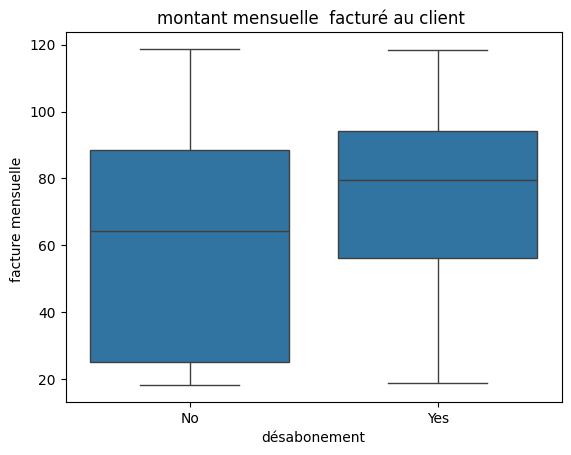

In [16]:
#monthly charges VS churn 
sns.boxplot(x=df['Churn'] , y='MonthlyCharges',data = df)
plt.xlabel('désabonement')
plt.ylabel('facture mensuelle ')
plt.title('montant mensuelle  facturé au client ')

Le montant total facturé aux clients qui ont résilié leur contrat est inférieur au montant total facturé aux clients qui ne l'ont pas fait. **Mais, les clients qui se sont désabonnés sont plus facturés mensuellement que les clients qui se se sont pas désabonnés.** Cette information est très importante pour l'entreprise car le montant facturé mensuellement peut être un facteur important qui détermine si un client va se désabonner
ou non.

Text(0.5, 1.0, 'nbr de mois pendant lesquels  le client  est resté en entreprise  ')

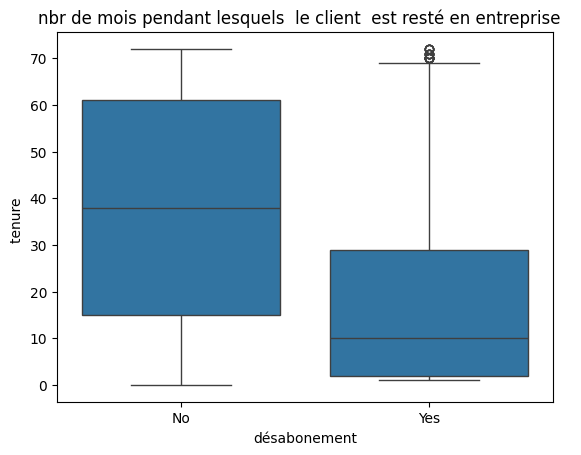

In [17]:
# tenure VS Churn 
sns.boxplot(x=df['Churn'] , y='tenure',data = df)
plt.xlabel('désabonement')
plt.ylabel('tenure ')
plt.title('nbr de mois pendant lesquels  le client  est resté en entreprise  ')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

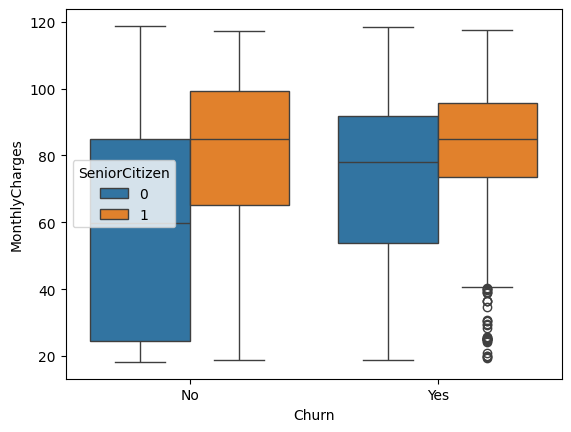

In [18]:
# MonthlyCharge VS churn by seniorCitizen 
sns.boxplot(x='Churn', y='MonthlyCharges',data=df,hue='SeniorCitizen')

Il semble que les personnes âgées soient beaucoup plus facturées mensuellement que les jeunes. Malgré cela, ils restent plus fidèles à l'entreprise que les jeunes.

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

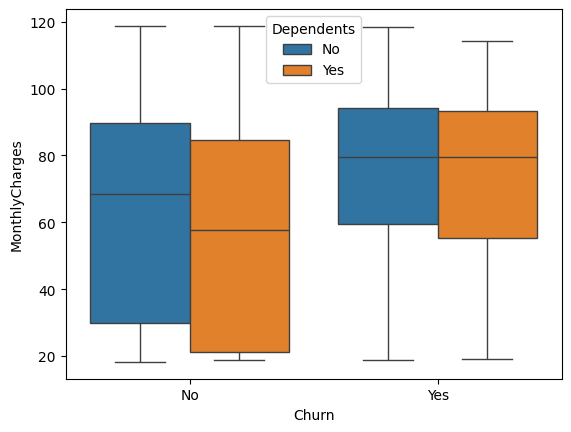

In [19]:
#monthlycharges VS churn by Dependents
sns.boxplot(x='Churn', y='MonthlyCharges',data=df,hue='Dependents') 

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


 Comme vous l'avez remarqué, les trois variables quantitatives (tenure, MonthlyCharges, et TotalCharges) ont **différentes échelles.** tenure varie entre 0 et 72 tandis que MonthlyCharges varie entre 18.25 et 118.75 et TotalCharges varie entre 18.8 et 8684.8. De nombreux modèles de Machine et de Deep Learning fonctionnent mieux avec des **variables standardisées ou normalisées.**  
#### Nous traiterons de la standardisation des données dans la section de prétraitement des données.

# prétraitement des données  

### Gestion des valeurs manquantes 


In [21]:
# Gestion des valeurs manquantes 

data = df.copy()

data.isna().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# Supression des valeurs manquantes 
data.dropna(inplace=True) 

### Encodage des variables catégorielles

In [23]:
#encodage des variables binaires

data['gender'] = data['gender'].apply (lambda row: 1 if row=='female' else 0)

binary_columns =  data.drop('gender', axis=1).nunique()[data.drop('gender',axis=1).nunique() < 3].keys().to_list()
binary_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [24]:
for column in binary_columns:
    data[column] = data[column].apply(lambda row:1 if row =='Yes' else 0)


In [25]:
# encodage des variables catégorielles restantes (qui ne sont pas binaires )  
remaining_cat_vars = data[categorical_columns].nunique()[data[categorical_columns].nunique() > 2].keys().to_list()  # le reste des  variables categ. 


# pd.get_dummies() crée des variables indicatrices (dummy variables) pour les variables catégorielles spécifiées
# remaining_cat_vars_dummies contiendra les nouvelles variables indicatrices pour les variables catégorielles restantes.

remaining_cat_vars_dummies = pd.get_dummies(data=data[remaining_cat_vars], columns=remaining_cat_vars, drop_first=True)  


In [26]:
# new dataframe 
data = pd.concat([data['gender'], data[binary_columns], remaining_cat_vars_dummies, data[numerical_columns]], axis=1)




In [27]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,True,False,False,...,False,False,False,False,False,True,False,1,29.85,29.85
1,0,0,0,0,1,0,0,False,False,False,...,False,False,True,False,False,False,True,34,56.95,1889.50
2,0,0,0,0,1,1,1,False,False,False,...,False,False,False,False,False,False,True,2,53.85,108.15
3,0,0,0,0,0,0,0,True,False,False,...,False,False,True,False,False,False,False,45,42.30,1840.75
4,0,0,0,0,1,1,1,False,False,True,...,False,False,False,False,False,True,False,2,70.70,151.65


In [28]:
c = ['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
for column in c:
 
    data[column] = data[column].astype(int)

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,29.85,29.85
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,34,56.95,1889.50
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,2,53.85,108.15
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,1,0,2,70.70,151.65


### Transformation de la variable asymétrique 'TotalCharges'

C:\Users\hp\AppData\Local\Temp\ipykernel_29800\292342472.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TotalCharges'], kde=False)


<Axes: xlabel='TotalCharges'>

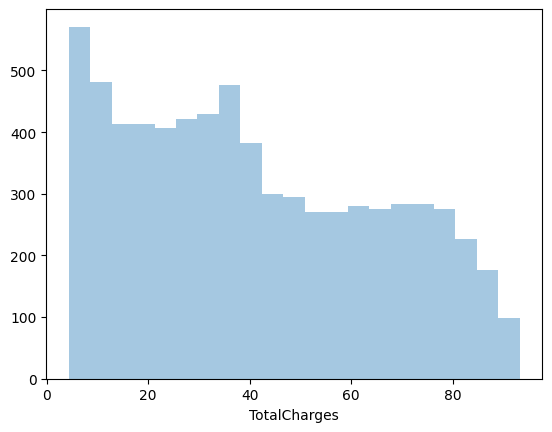

In [30]:

 # Transformation de la variable asymétrique 'TotalCharges'
 
 
data['TotalCharges'] = np.sqrt(data['TotalCharges'])


# Histogramme de la vaiable transformée
sns.distplot(data['TotalCharges'], kde=False)


In [31]:
# coefficient   d asymétrie 
data[ 'TotalCharges'].skew()

0.3089261418986736

### Division de données

In [32]:
# données d'entrainement (60%) , validation (20%) , test (20%) 
X = data.drop('Churn', axis=1)
y = data['Churn']
seed = 1111
# Diviser les données en ensembles d'entraînement (60%) et de test (40%), 
# en utilisant la stratification pour maintenir la même proportion de la variable cible y dans les deux ensembles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed, stratify=y)

# Diviser l'ensemble de test en ensembles de validation (20% du total) et de test (20% du total), en utilisant la stratification pour maintenir la même proportion de la variable cible y dans les deux ensembles
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed, stratify=y_test)



In [33]:
# Fréquence des classes 
pd.DataFrame(y).value_counts(normalize=True)

Churn
0        0.734215
1        0.265785
Name: proportion, dtype: float64

In [34]:
pd.DataFrame(y_train).value_counts(normalize=True)

Churn
0        0.734297
1        0.265703
Name: proportion, dtype: float64

In [35]:
pd.DataFrame(y_test).value_counts(normalize=True)

Churn
0        0.734186
1        0.265814
Name: proportion, dtype: float64

### Résoulution de problème de déséquilibre de classe dans les données

Attaquons-nous maintenant au problème de déséquilibre de classe dans les données.  
Lorsqu'il y a une très grande différence entre le nombre d'observations dans chaque catégorie de la variable cible à prédire, cela peut entraîner des erreurs de modélisation.  



Dans notre cas ici, il y a un peu plus de 73% de personnes qui n'ont pas résilié leur abonnement contre environ un peu plus de 26% qui ont résilié leur abonnement. Il y a donc un grand déséquilibre de classe. Nous pouvons utiliser le rééchantillonnage pour créer plus d'équilibre entre les catégorie de la variable cible. Soit on crée plus d'observations dans la classe minoritaire (modalité 1) c'est-à-dire on fait **un sur-échantillonnage,** soit on diminue les observations de la classe majoritaire (modalité 0) c'est-à-dire **un sous-échantillonnage.**

In [36]:

# resolution de problème de déséquilibre de classe : methode de sur-échantillonage de la claass menoritaire 
X2 = X_train
X2['Churn'] = y_train.values

#minority contient les lignes de X2 où la colonne 'Churn' est égale à 1, représentant la classe minoritaire
minority = X2[X2.Churn == 1]

# majority contient les lignes où la colonne 'Churn' est égale à 0, représentant la classe majoritaire
majority = X2[X2.Churn == 0]


# la fonction "resample" pour effectuer un suréchantillonnage de la classe minoritaire (minority)
# Le sur-échantillonnage est réalisé en échantillonnant avec remplacement pour obtenir un nombre d'échantillons égal à la taille de la classe majoritaire (len(majority)).

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=seed)
                       

# le code concatène les ensembles de données majority et minority_upsampled pour créer l'ensemble de données upsampled, qui contient maintenant une distribution équilibrée des classes.
upsampled = pd.concat([majority, minority_upsampled])



In [37]:
upsampled

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
6406,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,39,50.65,43.650888,0
6124,0,0,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,57,59.30,57.221936,0
4051,0,0,1,0,1,1,0,1,1,0,...,1,0,1,1,0,0,72,97.70,82.883653,0
3839,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,15,20.05,16.861198,0
2523,0,0,1,1,1,0,0,0,0,1,...,0,0,1,1,0,0,47,20.25,29.553342,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,0,0,0,1,1,1,0,0,1,0,...,0,0,0,0,1,0,1,69.65,8.345658,1
6040,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,70.75,8.411302,1
4212,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,1,90.60,9.518403,1
508,0,0,1,1,1,1,0,1,1,0,...,0,0,0,0,1,0,6,80.50,22.424317,1


In [38]:
# vérification 
upsampled['Churn'].value_counts(normalize = True)

Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

In [39]:
# données d entrainemment sur la base la methode de sur-échantillonnage de la classe minoritaire 

X_train_up = upsampled.drop('Churn' , axis = 1)
y_train_up = upsampled['Churn']

In [40]:

# resolution de problème de déséquilibre de classe : methode de sous-échantillonnage de la claass majoritaire 

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=seed)

# Concaténation des classes minoritaires et majoritaires downsamplées
downsampled = pd.concat([minority, majority_downsampled])

downsampled



,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
6908,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,9,55.35,21.207310,1
1530,0,0,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,2,90.00,13.785862,1
3617,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,18,48.35,28.472794,1
6800,0,0,1,0,1,0,0,0,1,0,...,1,1,0,0,0,1,14,105.95,36.727374,1
3772,0,0,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,1,95.00,9.746794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,0,0,1,0,1,0,0,1,1,0,...,1,0,1,0,1,0,71,109.25,87.793508,0
3663,0,0,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,9,88.40,28.082023,0
5033,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,1,19.40,4.404543,0
2183,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,2,50.20,10.452272,0


NameError: name 'churn' is not defined

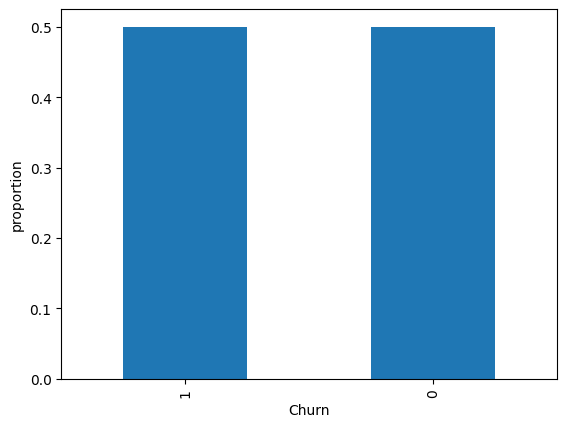

In [41]:
    downsampled["Churn"].value_counts(normalize=True).plot(kind='bar')
    plt.ylabel('proportion')
    plt.title('Distribution of ' + churn )
    plt.show()

In [39]:
# données d entrainemment sur la base la methode de sous-échantillonnage
X_train_down =downsampled.drop('Churn' , axis = 1)
y_train_down = downsampled['Churn']

In [40]:
# y_train et X_train 
y_train = X_train['Churn']
X_train = X_train.drop('Churn' , axis = 1)


In [41]:
# Définition des données d'entrainement 
# choix possibles :  (X_train , y_train) , (X_train_up, y_train_up) , (X_train_down , y_train_down) 


train_features = X_train_up  
train_labels = y_train_up


### normalisation des données 

In [42]:
train_features.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
6406,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,1,0,0,39,50.65,43.650888
6124,0,0,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,1,57,59.30,57.221936
4051,0,0,1,0,1,1,0,1,1,0,...,0,1,0,1,1,0,0,72,97.70,82.883653
3839,0,0,1,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,15,20.05,16.861198
2523,0,0,1,1,1,0,0,0,0,1,...,1,0,0,1,1,0,0,47,20.25,29.553342


In [43]:
# Normalisation des variable indepandantes des différents ensemble de données

scaler = MinMaxScaler()  # Ce scaler transforme les données de sorte que chaque caractéristique soit mise à l'échelle dans une plage spécifiée, généralement entre 0 et 1

mod_scaler = scaler.fit(train_features) # Le scaler est ajusté aux caractéristiques d'entraînement à l'aide de la méthode fit().

train_features = mod_scaler.transform(train_features)  # Les caractéristiques d'entraînement, les caractéristiques de validation (X_val) et les caractéristiques de test (X_test) sont transformées à l'aide du scaler ajusté. Cela est fait en utilisant la méthode transform().

X_val = mod_scaler.transform(X_val)

X_test = mod_scaler.transform(X_test)

# Retrransformation en dataframe 
train_features = pd.DataFrame(train_features , columns = X.columns)
X_val = pd.DataFrame(X_val , columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)


# Modélisation

In [44]:
# selection des meilleures variables predectrices
rf = RandomForestClassifier()

rf.fit(train_features,train_labels)

print(classification_report(y_val, rf.predict(X_val)))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1032
           1       0.57      0.51      0.54       374

    accuracy                           0.77      1406
   macro avg       0.70      0.68      0.69      1406
weighted avg       0.76      0.77      0.76      1406



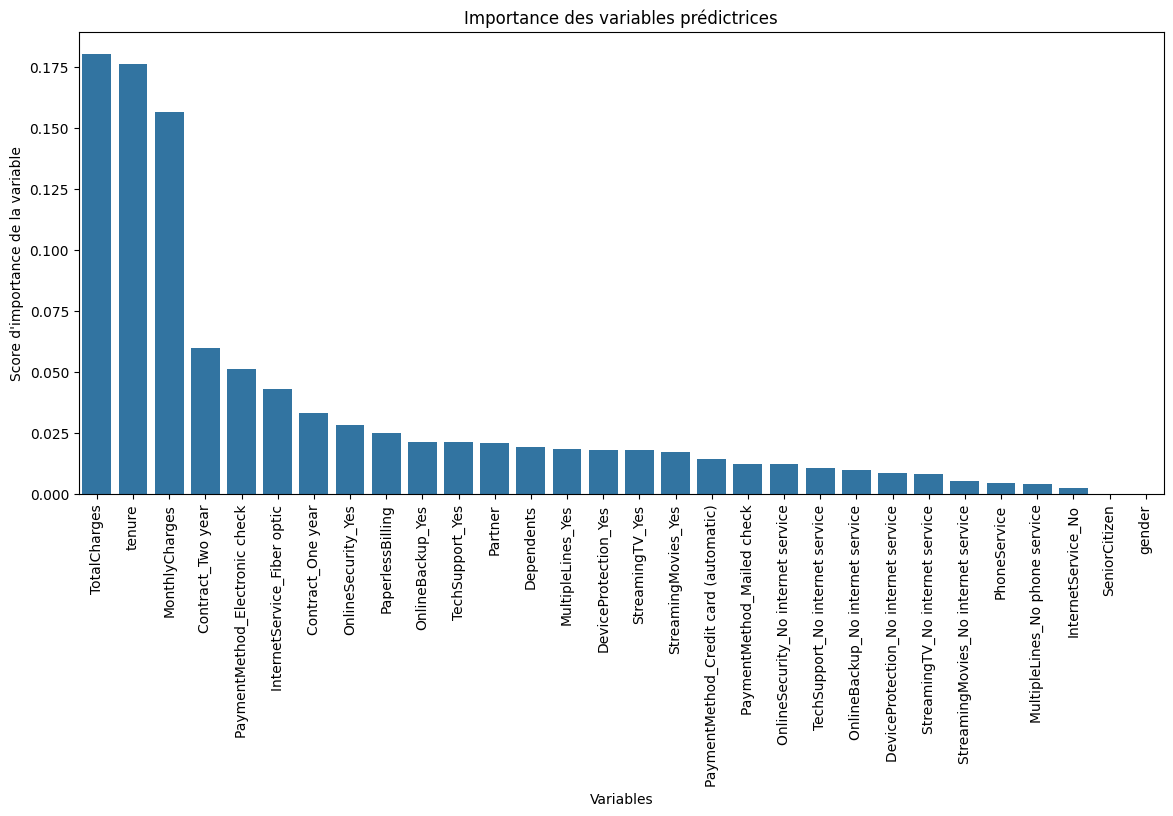

In [45]:
# importance des variables indépendantes 
plt.figure(figsize=(14,6))

# La variable vars_imp est créée en utilisant la fonction pd.Series() pour créer une série pandas à partir
# des importances des variables prédictrices (rf.feature_importances_) et en utilisant les noms de colonnes des X_train comme index.
# Ensuite, la série est triée par ordre décroissant pour afficher les variables les plus importantes en premier.
vars_imp = pd.Series(rf.feature_importances_, index=train_features.columns).sort_values(ascending=False)

sns.barplot(x=vars_imp.index, y=vars_imp)
plt.xticks(rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables prédictrices")
plt.show()

In [46]:
vars_imp 

TotalCharges                             0.180136
tenure                                   0.176034
MonthlyCharges                           0.156441
Contract_Two year                        0.059819
PaymentMethod_Electronic check           0.051207
InternetService_Fiber optic              0.043122
Contract_One year                        0.033236
OnlineSecurity_Yes                       0.028240
PaperlessBilling                         0.024919
OnlineBackup_Yes                         0.021397
TechSupport_Yes                          0.021187
Partner                                  0.020818
Dependents                               0.019196
MultipleLines_Yes                        0.018494
DeviceProtection_Yes                     0.018040
StreamingTV_Yes                          0.018016
StreamingMovies_Yes                      0.017166
PaymentMethod_Credit card (automatic)    0.014202
PaymentMethod_Mailed check               0.012475
OnlineSecurity_No internet service       0.012267


In [47]:
# variables selectionnées pour les algorithmes 
seuil = 0.01

vars_selected = vars_imp[ vars_imp >seuil].index.to_list()

train_features = train_features[vars_selected]

X_val = X_val[vars_selected]

X_test = X_test[vars_selected]

In [48]:

# nombre de variables prédictrices 
len(vars_selected)
vars_selected

['TotalCharges',
 'tenure',
 'MonthlyCharges',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'Contract_One year',
 'OnlineSecurity_Yes',
 'PaperlessBilling',
 'OnlineBackup_Yes',
 'TechSupport_Yes',
 'Partner',
 'Dependents',
 'MultipleLines_Yes',
 'DeviceProtection_Yes',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Mailed check',
 'OnlineSecurity_No internet service',
 'TechSupport_No internet service']

Notre objectif est de construire un modèle de classification qui prédit si un client va se désabonner ou non. Nous utiliserons différents algorithmes:    
 **(Logistic Regression, Random Forest, Gradient Boosting, Classificateur Perceptron Multicouche et Support Vector Machine)** afin de comparer leurs performances et de choisir le meilleur modèle.

### Régression logistique 

In [49]:

# recherche des meilleurs hyperparamètres pour le modèle de régression logistique en utilisant GridSearchCV.
param_grid = {'C': [0.001, 0.01, 1, 10, 50, 100, 5001]}

# objet GridSearchCV
grid_logreg_class = GridSearchCV(estimator=LogisticRegression(random_state=seed, max_iter=500), param_grid=param_grid, scoring='f1',cv=5)

# Entrainement de l'algorithme 
logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Le meilleur score (best_score_) et le meilleur estimateur (best_estimator_) sont affichés.
print(round(logreg_model.best_score_, 3))

print(logreg_model.best_estimator_)


0.79
LogisticRegression(C=50, max_iter=500, random_state=1111)


In [50]:
train_features


,TotalCharges,tenure,MonthlyCharges,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,Contract_One year,OnlineSecurity_Yes,PaperlessBilling,OnlineBackup_Yes,...,Partner,Dependents,MultipleLines_Yes,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,OnlineSecurity_No internet service,TechSupport_No internet service
0,0.442455,0.535211,0.322388,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,0.595186,0.788732,0.408458,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.883986,1.000000,0.790547,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.140961,0.197183,0.017910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.283800,0.647887,0.019900,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,0.045126,0.000000,0.511443,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6192,0.045865,0.000000,0.522388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6193,0.058325,0.000000,0.719900,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6194,0.203569,0.070423,0.619403,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
train_labels  

6406    0
6124    0
4051    0
3839    0
2523    0
       ..
5872    1
6040    1
4212    1
508     1
1056    1
Name: Churn, Length: 6196, dtype: int64

In [52]:
# fonction d'évaluation de la performance d'un modèle 
 
def model_evaluation(model, features, labels):
    
    pred = model.predict(features)
    print(classification_report(labels, pred)) 

In [53]:
# Evaluation de modèle de régression logistique

model_evaluation(logreg_model, X_val, y_val)

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1032
           1       0.51      0.74      0.61       374

    accuracy                           0.74      1406
   macro avg       0.70      0.74      0.71      1406
weighted avg       0.79      0.74      0.76      1406



# Sauvegarde du modèle dans un fichier .pkl
pickle.dump(logreg_model, open('model.pkl', 'wb'))                         

In [54]:
# Sauvegarde du modèle dans un fichier .pkl
pickle.dump(logreg_model, open('model.pkl', 'wb'))                         